<style>
H3{
    color:black;
}
</style>

<center><H1 style="color:black";style="text-align: center;">Data Preprocessing</H1>

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
import statistics
pd.options.mode.chained_assignment = None
import math
import plotly.express as px

### Import & consider the dataset

In [2]:
df = pd.read_excel('UsedCars_Syarah.xlsx')
df

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,مستعملة,103000,الرياض,114000
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,مستعملة,5448,الرياض,على السوم
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,مستعملة,72418,الرياض,27500
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,مستعملة,114154,الرياض,43000
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,مستعملة,41912,الرياض,59500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,اودي,A6,2015,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,مستعملة,77000,الرياض,75000
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,شفروليه,كمارو,2010,سعودي,سلفر,فل,NaN,بنزين,اوتوماتيك,مستعملة,150000,الرياض,53000
8245,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,تويوتا,لاندكروزر,2013,خليجي,أبيض,فل,NaN,بنزين,اوتوماتيك,مستعملة,260,نجران,على السوم
8246,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,التيما,2011,سعودي,سلفر,فل,2.5,بنزين,اوتوماتيك,مستعملة,18500,عسير,22000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         8248 non-null   object 
 1   Make         8248 non-null   object 
 2   Type         8248 non-null   object 
 3   Year         8248 non-null   int64  
 4   Origin       8153 non-null   object 
 5   Color        8248 non-null   object 
 6   Options      8139 non-null   object 
 7   Engine_Size  5982 non-null   float64
 8   Fuel_Type    8248 non-null   object 
 9   Gear_Type    8174 non-null   object 
 10  Condition    8248 non-null   object 
 11  Mileage      8248 non-null   int64  
 12  Region       8248 non-null   object 
 13  Price        8248 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 902.2+ KB


****

## Translate The Dataset

### Add all unique values from specific columns to the dictionary

In [4]:
# Put all columns in dictionary except columns that have data type numbers and link column 
dictionary = {} 

#            number of columns -1 
for i in range(df.shape[1]-1):
    if df.columns[1:][i] not in  ['Engine_Size','Mileage','Price','Year']:
        dictionary[df.columns[1:][i]] = df[df.columns[1:][i]].unique()
        
dictionary

{'Make': array(['كرايسلر', 'نيسان', 'هونداي', 'هوندا', 'تويوتا', 'جي إم سي',
        'شفروليه', 'مرسيدس', 'ميني', 'لكزس', 'لاند روفر', 'مازدا', 'فورد',
        'كيا', 'جينيسيس', 'كاديلاك', 'جيلي', 'ام جي', 'جيب', 'انفنتي',
        'دودج', 'فيراري', 'جريت وول', 'جاغوار', 'جي أيه سي', 'رينو',
        'سوزوكي', 'بيجو', 'شانجان', 'هافال', 'بي ام دبليو', 'رولز رویس',
        'بورش', 'ميتسوبيشي', 'ايسوزو', 'سوبارو', 'جنجو', 'اودي', 'لينكولن',
        'فولكسفاغن', 'دايهاتسو', 'فيات', 'بنتلي', 'فاو', 'شيري',
        'استون مارتن', 'بونتياك', 'ميركوري', 'بي واي دي', 'كلاسيكية',
        'سانج يونج', 'همر', 'اخرى', 'مازيراتي', 'ليفان', 'فوتون', 'تاتا',
        'فكتوريا اوتو', 'سكودا', 'JAC', 'افيكو', 'فولفو', 'اشوك', 'مان',
        'بيوك'], dtype=object),
 'Type': array(['C300', 'باترول', 'صني', 'النترا', 'اكورد', 'لاندكروزر', 'يوكن',
        'امبالا', 'يارس', 'كامري', 'تاهو', 'CLA', 'E', 'اكسنت', 'كورولا',
        'كوبر', 'برادو', 'سيفيك', 'فورتشنر', 'RX', 'رنج روفر', 'افالون',
        'باص اورف

In [5]:
# Size of dictionary 
len(dictionary)

9

In [6]:
#Size of keys inside dictionary 
for j in range(len(dictionary)):
    print(f'{list(dictionary.keys())[j]} ----(lenth)---> {len(dictionary[list(dictionary.keys())[j]])}')
    

Make ----(lenth)---> 65
Type ----(lenth)---> 435
Origin ----(lenth)---> 4
Color ----(lenth)---> 15
Options ----(lenth)---> 4
Fuel_Type ----(lenth)---> 3
Gear_Type ----(lenth)---> 3
Condition ----(lenth)---> 1
Region ----(lenth)---> 27


****

### Translate the dictionary from Arabic to English manually

### Why didn't we use an external library for translation?

In [7]:
translate_Make = ['Chrysler', 'Nissan', 'Hyundai', 'Honda', 'Toyota', 'GMC',
        'Chevrolet', 'Mercedes', 'MINI', 'Lexus', 'Land Rover', 'Mazda', 'Ford',
        'Kia', 'Genesis', 'Cadillac', 'Geely', 'MG', 'Jeep', 'INFINITI',
        'Dodge', 'Ferrari', 'Great Wall', 'Jaguar', 'GAC', 'Renault',
        'Suzuki', 'Peugeot', 'Changan', 'HAVAL', 'BMW', 'Rolls-Royce',
        'Porsche', 'Mitsubishi', 'Isuzu', 'Subaru', 'Zhengzhou', 'Audi', 'Lincoln',
        'Volkswagen', 'Daihatsu', 'Fiat', 'Bentley', 'FAW', 'Chery',
        'Aston Martin', 'Pontiac', 'Mercury', 'BYD', 'Classic',
        'SsangYong', 'Hummer', 'Other', 'Maserati', 'Lifan', 'Foton', 'Tata',
        'Victory Auto', 'Škoda', 'JAC', 'Iveco', 'Volvo', 'Ashok', 'MAN',
        'Buick']

In [8]:
df_test = pd.read_csv('Translate_Type.csv')
df_test



type_ = []

for x in range(len(df_test['Type_EN'])):
    type_.append(df_test['Type_EN'][x])

    
translate_Type = type_

translate_Type

['C300',
 'Patrol',
 'Sunny',
 'Elantra',
 'Accord',
 'Land Cruiser',
 'Yukon',
 'Impala',
 'Yaris',
 'Camry',
 'Tahoe',
 'CLA',
 'E',
 'Accent',
 'Corolla',
 'Copper',
 'Prado',
 'Civic',
 'Furniture',
 'RX',
 'Range Rover',
 'Avalon',
 'Bus Urvan',
 'Aurion',
 'Malibu',
 'Rav4',
 'CX9',
 'Expedition',
 'ES',
 'Cadenza',
 'Tucson',
 'Platinum',
 'G80',
 'Sonata',
 'LX',
 'Senta fe',
 'GX',
 'Azera',
 'CT-S',
 'EC7',
 'ZS',
 'Kona',
 'Grand Cherokee',
 'Optima',
 'S',
 'M',
 'Charger',
 'Taurus',
 'GTB 599 Fiorano',
 'Suburban',
 'Royal',
 'Picanto',
 'Power',
 'Datsun',
 'F-Pace',
 'Hilux',
 'FJ',
 'Explorer',
 'Land Cruiser 70',
 'GS8',
 'Maxima',
 'Caprice',
 'Challenger',
 'Camaro',
 'Symbol',
 'Fluence',
 '6',
 'RX5',
 'APV',
 '3008',
 'SRX',
 'Cerato',
 'Traverse',
 'Marquis',
 'Innova',
 'Sierra',
 'F150',
 'Genesis',
 'NX',
 'C',
 'G70',
 'Flex',
 'UX',
 'Dyna',
 'Cores',
 'Creta',
 'Rio',
 'Odyssey',
 'EC8',
 'Sylvian Bus',
 'CT6',
 'H1',
 'Ciocca',
 'Land Cruiser Pickup',
 'C

In [9]:
translate_Origin = ['Saudi', 'Gulf Arabic', 'Other', float("nan")]

In [10]:
translate_Color = ['Black', 'White', 'Silver', 'Grey',
                   'Navy', 'Bronze', 'Red','Another Color',
                   'Golden', 'Brown', 'Blue', 'Oily', 'Green', 'Orange','Yellow']

In [11]:
translate_Options  = ['Full', 'Standard', 'Semi Full', float("nan")]

In [12]:
translate_Fuel_Type = ['Gas', 'Diesel', 'Hybrid']

In [13]:
translate_Gear_Type = ["Automatic","Manual", float("nan")]

In [14]:
translate_Condition = ["Used"]

In [15]:
translate_Region = ['Riyadh', 'Jeddah', 'Dammam', 'Al-Medina', 'Qassim', 'Makkah', 'Jazan',
        'Tabouk', 'Aseer', 'Hail', 'Taef', 'Al-Ahsa', 'Abha', 'Hafar Al-Batin',
        'Sabya', 'Besha', 'Khobar', 'Al-Baha', 'Yanbu', 'Al-Namas', 'Jubail',
        'Najran', 'Al-Jouf', 'Arar', 'Qurayyat', 'Wadi Dawasir', 'Sakaka']

In [16]:
translate_list = [translate_Make ,translate_Type ,translate_Origin ,translate_Color,translate_Options, translate_Fuel_Type,translate_Gear_Type, translate_Condition, translate_Region]

In [17]:
# Put the translation in the dictionary
for x in range(len(list(dictionary.keys()))) :
    dictionary[list(dictionary.keys())[x]] = translate_list[x]
dictionary

{'Make': ['Chrysler',
  'Nissan',
  'Hyundai',
  'Honda',
  'Toyota',
  'GMC',
  'Chevrolet',
  'Mercedes',
  'MINI',
  'Lexus',
  'Land Rover',
  'Mazda',
  'Ford',
  'Kia',
  'Genesis',
  'Cadillac',
  'Geely',
  'MG',
  'Jeep',
  'INFINITI',
  'Dodge',
  'Ferrari',
  'Great Wall',
  'Jaguar',
  'GAC',
  'Renault',
  'Suzuki',
  'Peugeot',
  'Changan',
  'HAVAL',
  'BMW',
  'Rolls-Royce',
  'Porsche',
  'Mitsubishi',
  'Isuzu',
  'Subaru',
  'Zhengzhou',
  'Audi',
  'Lincoln',
  'Volkswagen',
  'Daihatsu',
  'Fiat',
  'Bentley',
  'FAW',
  'Chery',
  'Aston Martin',
  'Pontiac',
  'Mercury',
  'BYD',
  'Classic',
  'SsangYong',
  'Hummer',
  'Other',
  'Maserati',
  'Lifan',
  'Foton',
  'Tata',
  'Victory Auto',
  'Škoda',
  'JAC',
  'Iveco',
  'Volvo',
  'Ashok',
  'MAN',
  'Buick'],
 'Type': ['C300',
  'Patrol',
  'Sunny',
  'Elantra',
  'Accord',
  'Land Cruiser',
  'Yukon',
  'Impala',
  'Yaris',
  'Camry',
  'Tahoe',
  'CLA',
  'E',
  'Accent',
  'Corolla',
  'Copper',
  'Prado

****

### Using a dictionary to translate the dataset

In [18]:
df.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,كرايسلر,C300,2018,سعودي,أسود,فل,5.7,بنزين,اوتوماتيك,مستعملة,103000,الرياض,114000
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,نيسان,باترول,2016,سعودي,أبيض,فل,4.8,بنزين,اوتوماتيك,مستعملة,5448,الرياض,على السوم
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,نيسان,صني,2019,سعودي,سلفر,ستاندر,1.5,بنزين,اوتوماتيك,مستعملة,72418,الرياض,27500
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,رمادي,ستاندر,1.6,بنزين,اوتوماتيك,مستعملة,114154,الرياض,43000
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,هونداي,النترا,2019,سعودي,سلفر,نص فل,2.0,بنزين,اوتوماتيك,مستعملة,41912,الرياض,59500


In [19]:
def trans (col_name):
    type_values = df[col_name].unique()
    for x in range(0,len(df[col_name].unique())):
        print(x,": ",df[col_name].unique()[x]," ----> ",dictionary[col_name][x])
        df[col_name] = df[col_name].replace([type_values[x]],dictionary[col_name][x])

In [20]:
for x in list(dictionary.keys()):
    trans(x)

0 :  كرايسلر  ---->  Chrysler
1 :  نيسان  ---->  Nissan
2 :  هونداي  ---->  Hyundai
3 :  هوندا  ---->  Honda
4 :  تويوتا  ---->  Toyota
5 :  جي إم سي  ---->  GMC
6 :  شفروليه  ---->  Chevrolet
7 :  مرسيدس  ---->  Mercedes
8 :  ميني  ---->  MINI
9 :  لكزس  ---->  Lexus
10 :  لاند روفر  ---->  Land Rover
11 :  مازدا  ---->  Mazda
12 :  فورد  ---->  Ford
13 :  كيا  ---->  Kia
14 :  جينيسيس  ---->  Genesis
15 :  كاديلاك  ---->  Cadillac
16 :  جيلي  ---->  Geely
17 :  ام جي  ---->  MG
18 :  جيب  ---->  Jeep
19 :  انفنتي  ---->  INFINITI
20 :  دودج  ---->  Dodge
21 :  فيراري  ---->  Ferrari
22 :  جريت وول  ---->  Great Wall
23 :  جاغوار  ---->  Jaguar
24 :  جي أيه سي  ---->  GAC
25 :  رينو  ---->  Renault
26 :  سوزوكي  ---->  Suzuki
27 :  بيجو  ---->  Peugeot
28 :  شانجان  ---->  Changan
29 :  هافال  ---->  HAVAL
30 :  بي ام دبليو  ---->  BMW
31 :  رولز رویس  ---->  Rolls-Royce
32 :  بورش  ---->  Porsche
33 :  ميتسوبيشي  ---->  Mitsubishi
34 :  ايسوزو  ---->  Isuzu
35 :  سوبارو  ---->  Subar

263 :  سي سي  ---->  CC
264 :  كوستر  ---->  Coaster
265 :  C-HR  ---->  C-HR
266 :  S7  ---->  S7
267 :  وينغل  ---->  Wingle
268 :  تيرين  ---->  Terrain
269 :  كولورادو  ---->  Colorado
270 :  رام  ---->  Ram
271 :  فيتارا  ---->  Vitara
272 :  جوك  ---->  Juke
273 :  سي200  ---->  C200
274 :  FX  ---->  FX
275 :  تيريوس  ---->  Terios
276 :  فليتوود  ---->  Fleetwood
277 :  ميلان  ---->  Milan
278 :  كايمان  ---->  Cayman
279 :  بوكسر  ---->  Boxer
280 :  ATS  ---->  ATS
281 :  كاديلاك  ---->  Cadillac
282 :  ريكستون  ---->  Rexton
283 :  اتش 3  ---->  H3
284 :  تندرا  ---->  Tundra
285 :  انفوي  ---->  Envoy
286 :  T60  ---->  T60
287 :  بريوس  ---->  Prius
288 :  ماونتينير  ---->  Montero2
289 :  جاغوار  ---->  Jaguar
290 :  باص روزا  ---->  Osa Bus
291 :  F3  ---->  F3
292 :  اكس اف  ---->  XF
293 :  جيبلي  ---->  Gamble
294 :  الفئة الثالثة  ---->  The 3
295 :  كوراندو  ---->  Koranado
296 :  L200  ---->  L200
297 :  كراون  ---->  Crown
298 :  لانسر  ---->  Lancer
299 :  360  -

In [21]:
df['Price'] = df['Price'].replace('على السوم','Negotiable')

### After translation

In [22]:
df.head()

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price
0,https://syarah.com/%D9%83%D8%B1%D8%A7%D9%8A%D8...,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000
1,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable
2,https://syarah.com/online/%D9%86%D9%8A%D8%B3%D...,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500
3,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000
4,https://syarah.com/online/%D9%87%D9%88%D9%86%D...,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500


****

## Add new column 

In [23]:
df["Negotiable"]=''
for x in range(len(df['Price'])):
    if df['Price'].iloc[x] == 'Negotiable':
        df["Negotiable"].iloc[x]=True
    else:
        df["Negotiable"].iloc[x] =False


In [24]:
df.sample(10)

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
4932,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Altima,2010,Saudi,Black,Full,2.5,Gas,Automatic,Used,236660,Al-Ahsa,Negotiable,True
6205,https://syarah.com/%D9%81%D9%88%D8%B1%D8%AF_%D...,Ford,Marquis,2008,Other,Grey,Full,1.8,Gas,Automatic,Used,125790,Tabouk,Negotiable,True
1308,https://syarah.com/%D9%87%D9%88%D9%86%D8%AF%D8...,Hyundai,Accent,2017,Saudi,White,Standard,1.4,Gas,Automatic,Used,168000,Jeddah,29000,False
4308,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Altima,1994,Other,White,Full,2.5,Gas,Manual,Used,300000,Dammam,Negotiable,True
7200,https://syarah.com/%D8%B4%D9%81%D8%B1%D9%88%D9...,Chevrolet,Tahoe,2018,Saudi,Black,Standard,5.3,Gas,Automatic,Used,39000,Aseer,147000,False
199,https://syarah.com/%D8%A8%D9%8A%D8%AC%D9%88_30...,Peugeot,3008,2018,Saudi,Brown,Full,1.0,Gas,Automatic,Used,30000,Riyadh,79000,False
3186,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Furniture,2009,Saudi,Silver,Standard,2.7,Gas,Manual,Used,530500,Taef,33000,False
309,https://syarah.com/%D9%83%D8%B1%D8%A7%D8%B3%D9...,Chrysler,300,2016,Gulf Arabic,White,Full,3.5,Gas,Automatic,Used,16000,Riyadh,90000,False
3098,https://syarah.com/%D9%81%D9%88%D8%B1%D8%AF_%D...,Ford,Taurus,2015,NaN,Red,NaN,NaN,Gas,Automatic,Used,175000,Riyadh,Negotiable,True
6180,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Navara,2009,Saudi,White,Standard,NaN,Gas,Manual,Used,290,Taef,Negotiable,True


In [25]:
#df.to_csv("UsedCarsSA_Unclean_EN.csv", index = False)

****

## Data Cleaning

In [26]:
df.shape

(8248, 15)

In [27]:
df.dtypes 

Link            object
Make            object
Type            object
Year             int64
Origin          object
Color           object
Options         object
Engine_Size    float64
Fuel_Type       object
Gear_Type       object
Condition       object
Mileage          int64
Region          object
Price           object
Negotiable      object
dtype: object

### Change Negotiable to 0 

In [28]:
df['Price'] = df['Price'].replace('Negotiable', 0)
df.shape

(8248, 15)

### Change the data type of Price column

In [29]:
# price:  object ---> int64
df["Price"] = pd.to_numeric(df["Price"])
df.dtypes

Link            object
Make            object
Type            object
Year             int64
Origin          object
Color           object
Options         object
Engine_Size    float64
Fuel_Type       object
Gear_Type       object
Condition       object
Mileage          int64
Region          object
Price            int64
Negotiable      object
dtype: object

### Change the data type of Negotiable column

In [30]:
# Negotiable:  object ---> bool
df["Negotiable"] = df["Negotiable"].astype(bool)
df.dtypes

Link            object
Make            object
Type            object
Year             int64
Origin          object
Color           object
Options         object
Engine_Size    float64
Fuel_Type       object
Gear_Type       object
Condition       object
Mileage          int64
Region          object
Price            int64
Negotiable        bool
dtype: object

### Remove duplicate columns depend on repeated values specific columns

In [31]:
#remove duplicate car
df = df.drop_duplicates(subset=['Make', 'Type', 'Year', 'Origin', 'Color', 'Engine_Size', 'Mileage', 'Region', 'Price'], keep='last')
df.shape

(8172, 15)

### Identifying & handling the missing values

In [32]:
df.isnull().sum()

Link              0
Make              0
Type              0
Year              0
Origin           95
Color             0
Options         109
Engine_Size    2253
Fuel_Type         0
Gear_Type        74
Condition         0
Mileage           0
Region            0
Price             0
Negotiable        0
dtype: int64

### Fillna in Origin column by Unknown

In [33]:
df[['Origin']] = df[['Origin']].fillna(value='Unknown')
df["Origin"].isnull().sum()

0

### Create functions to clean Nan and return mode value of target_column depend on conditions (Make and Type) in next steps

In [34]:
def Get_Mode (df, make, type_car, target_column):
    df = df[((df["Make"]== make) & (df["Type"]== type_car))] # Get Similar rows
    return statistics.mode(df[target_column]) # Return the mode value

In [35]:
def Clean_Na (df, df_Na, target_column):
    for i in range(len(df_Na)): # to pass all rows that contain Nan in target_column
        print(df_Na.iloc[i][1],"   ",df_Na.iloc[i][2])
        Mode_Value = Get_Mode(df,df_Na.iloc[i][1],df_Na.iloc[i][2], target_column) # Call Get_Mode function
        print(Mode_Value)
        # Replace Nan with mode value
        df.loc[((df["Make"]== df_Na.iloc[i][1]) & (df["Type"]== df_Na.iloc[i][2]) & (df[target_column].isnull())), target_column] = Mode_Value
    return df

### Fillna in Options column by Clean_Na function

In [36]:
Options_NA = df[df['Options'].isna()]
Options_NA

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
247,https://syarah.com/%D9%84%D8%A7%D9%86%D8%AF_%D...,Land Rover,Range Rover,2019,Other,Black,NaN,NaN,Gas,Automatic,Used,1800,Riyadh,350000,False
1474,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Camry,2012,Saudi,Silver,NaN,NaN,Gas,Automatic,Used,211869,Al-Ahsa,0,True
1475,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Camry,2016,Unknown,White,NaN,NaN,Gas,Automatic,Used,254000,Riyadh,0,True
1478,https://syarah.com/%D9%81%D9%88%D8%B1%D8%AF_%D...,Ford,Expedition,2015,Unknown,Black,NaN,NaN,Gas,NaN,Used,125000,Jeddah,75000,False
1699,https://syarah.com/%D8%B4%D9%81%D8%B1%D9%88%D9...,Chevrolet,Traverse,2016,Saudi,White,NaN,NaN,Gas,Automatic,Used,56500,Tabouk,65000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7564,https://syarah.com/%D9%85%D9%8A%D8%AA%D8%B3%D9...,Mitsubishi,Fuso Canter,2004,Unknown,White,NaN,NaN,Gas,NaN,Used,116000,Arar,0,True
7565,https://syarah.com/%D9%84%D8%A7%D9%86%D8%AF_%D...,Land Rover,Range Rover,2019,Other,Grey,NaN,NaN,Gas,Automatic,Used,4200,Riyadh,599000,False
7566,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Land Cruiser,2014,Unknown,White,NaN,NaN,Gas,NaN,Used,191000,Riyadh,0,True
7567,https://syarah.com/%D9%83%D9%8A%D8%A7_%D8%B3%D...,Kia,Cerato,2012,Unknown,Black,NaN,NaN,Gas,NaN,Used,265000,Jeddah,0,True


In [37]:
df = Clean_Na(df, Options_NA, "Options")

Land Rover     Range Rover
Full
Toyota     Camry
Standard
Toyota     Camry
Standard
Ford     Expedition
Semi Full
Chevrolet     Traverse
Standard
Pontiac     Bonneville
nan
Ford     Taurus
Standard
Toyota     Innova
Standard
Chevrolet     Tahoe
Semi Full
Toyota     Rav4
Standard
Ford     Expedition
Semi Full
Land Rover     Range Rover
Full
Land Rover     Range Rover
Full
SsangYong     Rexton
nan
Toyota     Land Cruiser
Full
Nissan     Datsun
Full
GMC     Yukon
Full
Mitsubishi     Outlander
Semi Full
Ford     Taurus
Standard
Chevrolet     Silverado
Semi Full
Toyota     Land Cruiser
Full
Dodge     Charger
Full
Toyota     Camry
Standard
Daihatsu     Delta
Standard
Hyundai     Sonata
Semi Full
Lexus     ES
Full
Hyundai     Accent
Standard
Toyota     Land Cruiser Pickup
Full
Toyota     Furniture
Semi Full
BMW     The 7
Full
Toyota     Camry
Standard
Toyota     Camry
Standard
Toyota     Land Cruiser
Full
Mercedes     G
Full
Bentley     Continental GT
nan
Nissan     Patrol
Full
Ford     Edge


### Fillna in Engine_Size column by Clean_NA function

In [38]:
Engine_Size_NA = df[df['Engine_Size'].isna()]
Engine_Size_NA

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
13,https://syarah.com/%D9%85%D8%B1%D8%B3%D9%8A%D8...,Mercedes,CLA,2020,Other,White,Standard,NaN,Gas,Automatic,Used,20000,Riyadh,235000,False
29,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Avalon,2008,Other,Red,Full,NaN,Gas,Automatic,Used,169000,Riyadh,0,True
42,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Land Cruiser,1993,Saudi,Bronze,Semi Full,NaN,Gas,Manual,Used,400,Tabouk,12000,False
60,https://syarah.com/%D9%87%D9%88%D9%86%D8%AF%D8...,Hyundai,Senta fe,2021,Saudi,Navy,Semi Full,NaN,Gas,Automatic,Used,2200,Riyadh,0,True
72,https://syarah.com/%D8%AC%D9%8A%D9%84%D9%8A_EC...,Geely,EC7,2014,Saudi,Golden,Full,NaN,Gas,Manual,Used,161300,Riyadh,12000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,https://syarah.com/%D9%81%D9%88%D8%B1%D8%AF_%D...,Ford,Explorer,2009,Saudi,White,Semi Full,NaN,Gas,Automatic,Used,270000,Riyadh,0,True
8236,https://syarah.com/%D8%AC%D9%8A_%D8%A5%D9%85_%...,GMC,Yukon,2019,Saudi,Grey,Full,NaN,Gas,Automatic,Used,50000,Jubail,1,False
8243,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Audi,A6,2015,Saudi,Silver,Full,NaN,Gas,Automatic,Used,77000,Riyadh,75000,False
8244,https://syarah.com/%D9%84%D9%84%D8%A8%D9%8A%D8...,Chevrolet,Camaro,2010,Saudi,Silver,Full,NaN,Gas,Automatic,Used,150000,Riyadh,53000,False


In [39]:
df = Clean_Na(df, Engine_Size_NA, "Engine_Size")

Mercedes     CLA
2.0
Toyota     Avalon
3.5
Toyota     Land Cruiser
4.6
Hyundai     Senta fe
3.3
Geely     EC7
1.8
Lexus     ES
3.5
GMC     Yukon
5.3
Mercedes     S
3.0
Mercedes     CLA
2.0
Nissan     Datsun
2.4
Chevrolet     Suburban
5.3
Ford     Explorer
3.5
Toyota     Land Cruiser 70
4.0
Toyota     Prado
4.0
Ford     Expedition
5.4
Land Rover     Range Rover
5.0
Toyota     Furniture
2.7
Ford     Taurus
3.5
Ford     Taurus
3.5
Cadillac     SRX
nan
Ford     Marquis
4.6
Toyota     Innova
2.7
GMC     Sierra
5.3
Toyota     Land Cruiser
4.6
Ford     Explorer
3.5
Mercedes     E
2.0
Land Rover     Range Rover
5.0
Toyota     Dyna
nan
Geely     EC8
nan
Mazda     6
2.5
Land Rover     Range Rover
5.0
Hyundai     H1
2.4
Mercedes     S
3.0
Toyota     Cressida
2.4
Mercedes     GLC
2.0
Hyundai     H1
2.4
Kia     Carnival
3.3
Chevrolet     Tahoe
5.3
Mercedes     E
2.0
Mazda     CX9
2.5
Nissan     Land Cruiser Pickup
4.8
Toyota     Land Cruiser
4.6
Mazda     CX5
2.5
Land Rover     Range Rover
5.0
BMW 

4.6
Kia     Rio
1.4
Ford     Taurus
3.5
Ford     Taurus
3.5
Toyota     Prado
4.0
Jaguar     X Type
nan
Ford     Taurus
3.5
Toyota     Camry
2.5
Mazda     6
2.5
Toyota     Land Cruiser 70
4.0
Chrysler     C300
5.7
Toyota     Furniture
2.7
GMC     Suburban
5.3
Toyota     FJ
4.0
Nissan     Sunny
1.5
Nissan     Tiida
nan
Lexus     ES
3.5
GMC     Savana
nan
Toyota     Land Cruiser
4.6
Hyundai     Accent
1.4
Nissan     Altima
2.5
Toyota     Hiace
2.7
Nissan     Datsun
2.4
Toyota     Prado
4.0
Toyota     Land Cruiser
4.6
Hyundai     Accent
1.4
Land Rover     Range Rover
5.0
Toyota     Rav4
2.5
Toyota     Camry
2.5
Nissan     Patrol
4.0
Chevrolet     Caprice
6.0
Ford     Edge
3.5
Ford     Expedition
5.4
Jaguar     XJR
nan
GMC     Yukon
5.3
Toyota     Land Cruiser
4.6
Toyota     Land Cruiser
4.6
GMC     Savana
nan
Toyota     Hilux
2.7
Ford     Taurus
3.5
Toyota     Avalon
3.5
Cadillac     Escalade
6.2
Chevrolet     Malibu
2.5
INFINITI     QX
3.7
Nissan     Armada
5.6
Toyota     Land Cruiser 70


Ford     Edge
3.5
Chevrolet     Caprice
6.0
Nissan     Pathfinder
3.5
Hyundai     H1
2.4
Toyota     Prado
4.0
Toyota     Land Cruiser Pickup
4.0
Mercedes     G
4.0
Lexus     LS
4.6
Toyota     Camry
2.5
Ford     Explorer
3.5
GMC     Suburban
5.3
Toyota     Avalon
3.5
Chevrolet     Optra
1.6
Toyota     Hilux
2.7
Mazda     CX9
2.5
Kia     K4000G
nan
Cadillac     ATS
2.0
Land Rover     Range Rover
5.0
Mercedes     Sprinter
nan
Toyota     Avalon
3.5
Toyota     Camry
2.5
Toyota     Hilux
2.7
Ford     Victoria
4.6
Maserati     Quattroporte
nan
Chevrolet     Caprice
6.0
Toyota     Corolla
1.6
Ford     Victoria
4.6
Cadillac     Escalade
6.2
Dodge     Charger
3.6
Toyota     Hilux
2.7
Toyota     Hilux
2.7
Toyota     FJ
4.0
Ford     Explorer
3.5
Toyota     Yaris
1.5
Kia     Carnival
3.3
Chrysler     S300
3.6
Toyota     FJ
4.0
Renault     Dokker
1.6
Nissan     VTC
4.8
Chevrolet     Impala
3.6
Chrysler     300
3.5
Toyota     Hilux
2.7
Honda     Accord
2.4
Ford     F150
5.0
Chevrolet     Other
nan
Hy

Other     Other
2.4
Nissan     Pathfinder
3.5
Ford     Edge
3.5
Land Rover     LR2
nan
Toyota     Hilux
2.7
Toyota     Prado
4.0
Toyota     Previa
2.4
Hyundai     Accent
1.4
Ford     Taurus
3.5
BMW     The 7
2.0
Toyota     Camry
2.5
Mercedes     C
2.0
Mercedes     S
3.0
Ford     Marquis
4.6
Lexus     ES
3.5
Ford     Flex
3.5
Lexus     ES
3.5
GMC     Yukon
5.3
Chevrolet     Blazer
3.6
Ford     Expedition
5.4
Renault     Symbol
1.6
Ford     Victoria
4.6
Chevrolet     Tahoe
5.3
Mercedes     Axor
nan
Toyota     Yaris
1.5
Hyundai     Kona
2.0
Mazda     3
1.6
Ford     Taurus
3.5
Ford     Taurus
3.5
Honda     Odyssey
3.5
Chevrolet     Tahoe
5.3
Mazda     CX9
2.5
Toyota     Prado
4.0
Toyota     Innova
2.7
Toyota     Furniture
2.7
GMC     Acadia
3.6
Cadillac     Escalade
6.2
Toyota     Land Cruiser
4.6
Toyota     Land Cruiser
4.6
Honda     Civic
1.6
Mitsubishi     Pajero
3.5
Toyota     Furniture
2.7
Kia     Carnival
3.3
Ford     Expedition
5.4
Chrysler     S300
3.6
Chevrolet     Cruze
1.8
Ford 

4.0
Cadillac     CT4
3.7
Nissan     Datsun
2.4
Chevrolet     Tahoe
5.3
Hyundai     H1
2.4
Toyota     Innova
2.7
Toyota     Corolla
1.6
GMC     Yukon
5.3
Peugeot     301
1.6
Toyota     Innova
2.7
Toyota     Land Cruiser
4.6
Chevrolet     Corvette
nan
Lexus     LX
5.7
Nissan     Sunny
1.5
Chevrolet     Suburban
5.3
Isuzu     D-MAX
2.5
Toyota     Hilux
2.7
Toyota     Land Cruiser
4.6
Nissan     Patrol
4.0
Chevrolet     Suburban
5.3
GMC     Sierra
5.3
Toyota     Land Cruiser
4.6
Toyota     Yaris
1.5
GMC     Yukon
5.3
Toyota     Hiace
2.7
Toyota     Prado
4.0
Ford     Marquis
4.6
Nissan     Pathfinder
3.5
Mercedes     C
2.0
Toyota     Land Cruiser
4.6
Hyundai     Sonata
2.4
Chevrolet     Tahoe
5.3
Lexus     LX
5.7
Rolls-Royce     Ghost
6.0
Volvo     FH
nan
Honda     Accord
2.4
Ford     Explorer
3.5
GMC     Sierra
5.3
Toyota     Land Cruiser Pickup
4.0
Toyota     Land Cruiser
4.6
Mercedes     S
3.0
Ford     Taurus
3.5
Ford     Victoria
4.6
Chrysler     C300
5.7
Nissan     Sunny
1.5
Toyota   

Toyota     FJ
4.0
Land Rover     Defender
4.0
Jeep     Grand Cherokee
5.7
Lexus     LX
5.7
Fiat     Linea
nan
GMC     Sierra
5.3
Toyota     Camry
2.5
Chevrolet     Tahoe
5.3
Toyota     Land Cruiser
4.6
GMC     Yukon
5.3
Chevrolet     Silverado
5.3
Cadillac     SRX
nan
Chevrolet     Blazer
3.6
Toyota     Camry
2.5
GMC     Envoy
nan
Kia     Optima
2.4
Toyota     Hilux
2.7
Hyundai     H1
2.4
Nissan     Pathfinder
3.5
Nissan     Pathfinder
3.5
Mitsubishi     Fuso Canter
nan
Land Rover     Range Rover
5.0
Toyota     Land Cruiser
4.6
Kia     Cerato
1.6
Chevrolet     Malibu
2.5
Ford     Flex
3.5
Kia     Mohave
3.8
Mercedes     ALB
nan
Toyota     Land Cruiser
4.6
Hyundai     H1
2.4
Toyota     Land Cruiser
4.6
Ford     Expedition
5.4
Chevrolet     Optra
1.6
Mercedes     GLC
2.0
Mercedes     CLA
2.0
GMC     Yukon
5.3
Hyundai     H1
2.4
Lexus     ES
3.5
Chevrolet     Tahoe
5.3
Toyota     Land Cruiser
4.6
GMC     Yukon
5.3
Maserati     Quattroporte
nan
GMC     Yukon
5.3
Chevrolet     Tahoe
5.3
For

### Fillna in Gear_Type column by Clean_NA function

In [40]:
Gear_Type_NA = df[df['Gear_Type'].isna()]
Gear_Type_NA

,Link,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
1478,https://syarah.com/%D9%81%D9%88%D8%B1%D8%AF_%D...,Ford,Expedition,2015,Unknown,Black,Semi Full,5.4,Gas,NaN,Used,125000,Jeddah,75000,False
1777,https://syarah.com/%D9%81%D9%88%D8%B1%D8%AF_%D...,Ford,Expedition,2006,Saudi,White,Semi Full,5.4,Gas,NaN,Used,276000,Aseer,0,True
2700,https://syarah.com/%D8%B3%D9%8A%D8%A7%D8%B1%D9...,SsangYong,Rexton,2011,Unknown,White,NaN,NaN,Gas,NaN,Used,246026,Riyadh,0,True
2703,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Datsun,1998,Unknown,White,Full,2.4,Gas,NaN,Used,351544,Aseer,0,True
2705,https://syarah.com/%D8%AC%D9%8A_%D8%A7%D9%85_%...,GMC,Yukon,2007,Unknown,Grey,Full,5.3,Gas,NaN,Used,300000,Riyadh,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7562,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Pathfinder,2003,Unknown,Grey,Semi Full,3.5,Gas,NaN,Used,500000,Riyadh,0,True
7563,https://syarah.com/%D9%86%D9%8A%D8%B3%D8%A7%D9...,Nissan,Pathfinder,2002,Unknown,Golden,Full,3.5,Gas,NaN,Used,458312,Qassim,0,True
7564,https://syarah.com/%D9%85%D9%8A%D8%AA%D8%B3%D9...,Mitsubishi,Fuso Canter,2004,Unknown,White,NaN,NaN,Gas,NaN,Used,116000,Arar,0,True
7566,https://syarah.com/%D8%AA%D9%88%D9%8A%D9%88%D8...,Toyota,Land Cruiser,2014,Unknown,White,Full,4.6,Gas,NaN,Used,191000,Riyadh,0,True


In [41]:
df = Clean_Na(df, Gear_Type_NA, "Gear_Type")

Ford     Expedition
Automatic
Ford     Expedition
Automatic
SsangYong     Rexton
nan
Nissan     Datsun
Manual
GMC     Yukon
Automatic
Mercury     Grand Marquis
Automatic
Chevrolet     Silverado
Automatic
Daihatsu     Delta
Manual
Lexus     ES
Automatic
Hyundai     Accent
Automatic
Toyota     Land Cruiser Pickup
Manual
BMW     The 7
Automatic
Toyota     Camry
Automatic
Nissan     Patrol
Automatic
Toyota     Camry
Automatic
Toyota     Land Cruiser
Automatic
Nissan     Patrol
Automatic
GMC     Sierra
Automatic
Ford     Taurus
Automatic
Toyota     Camry
Automatic
Ford     Taurus
Automatic
Chevrolet     Traverse
Automatic
Chevrolet     Caprice
Automatic
Hyundai     Elantra
Automatic
Kia     Optima
Automatic
Chevrolet     Silverado
Automatic
Toyota     Land Cruiser
Automatic
Toyota     Hilux
Manual
Mercedes     GLA
nan
Chevrolet     Tahoe
Automatic
Toyota     Camry
Automatic
Mitsubishi     Pajero
Automatic
Chevrolet     Caprice
Automatic
Chevrolet     Caprice
Automatic
Ford     Taurus
Automa

### After clean Nan values

In [42]:
df.isnull().sum()

Link             0
Make             0
Type             0
Year             0
Origin           0
Color            0
Options          7
Engine_Size    137
Fuel_Type        0
Gear_Type        6
Condition        0
Mileage          0
Region           0
Price            0
Negotiable       0
dtype: int64

### Drop rows with NaN

In [43]:
df = df.dropna(subset = ['Options', 'Engine_Size']) 
df.shape

(8035, 15)

In [44]:
df.isnull().sum()

Link           0
Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Condition      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

### Drop Link & Condition columns (Final shape for dataset)

In [45]:
df = df.drop(columns=['Link', 'Condition'])
df

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8243,Audi,A6,2015,Saudi,Silver,Full,3.0,Gas,Automatic,77000,Riyadh,75000,False
8244,Chevrolet,Camaro,2010,Saudi,Silver,Full,3.6,Gas,Automatic,150000,Riyadh,53000,False
8245,Toyota,Land Cruiser,2013,Gulf Arabic,White,Full,4.6,Gas,Automatic,260,Najran,0,True
8246,Nissan,Altima,2011,Saudi,Silver,Full,2.5,Gas,Automatic,18500,Aseer,22000,False


In [46]:
#df.to_csv("UsedCarsSA_Clean_EN.csv", index = False)

## The Dataset on Kaggel
https://www.kaggle.com/turkibintalib/saudi-arabia-used-cars-dataset

****

## Overview & Analysis of The Dataset

In [47]:
sns.set_palette('mako_r') # set color palette for all charts, we can choose 'rocket'

In [48]:
#get top 6 cars
df[['Make', 'Type']]['Make'].value_counts()[:6]

Toyota       2038
Hyundai       941
Ford          763
Chevrolet     644
Nissan        548
GMC           400
Name: Make, dtype: int64

In [49]:
df_topcar = df[['Make', 'Type', 'Price', 'Year']]
df_topcar = df_topcar[df_topcar['Make'].isin(['Toyota', 'Hyundai', 'Ford', 'Chevrolet', 'Nissan', 'Kia'])]
df_topcar

,Make,Type,Price,Year
1,Nissan,Patrol,0,2016
2,Nissan,Sunny,27500,2019
3,Hyundai,Elantra,43000,2019
4,Hyundai,Elantra,59500,2019
6,Toyota,Land Cruiser,92000,2011
...,...,...,...,...
8241,Kia,Cadenza,25000,2012
8242,Kia,Sorento,15000,2006
8244,Chevrolet,Camaro,53000,2010
8245,Toyota,Land Cruiser,0,2013


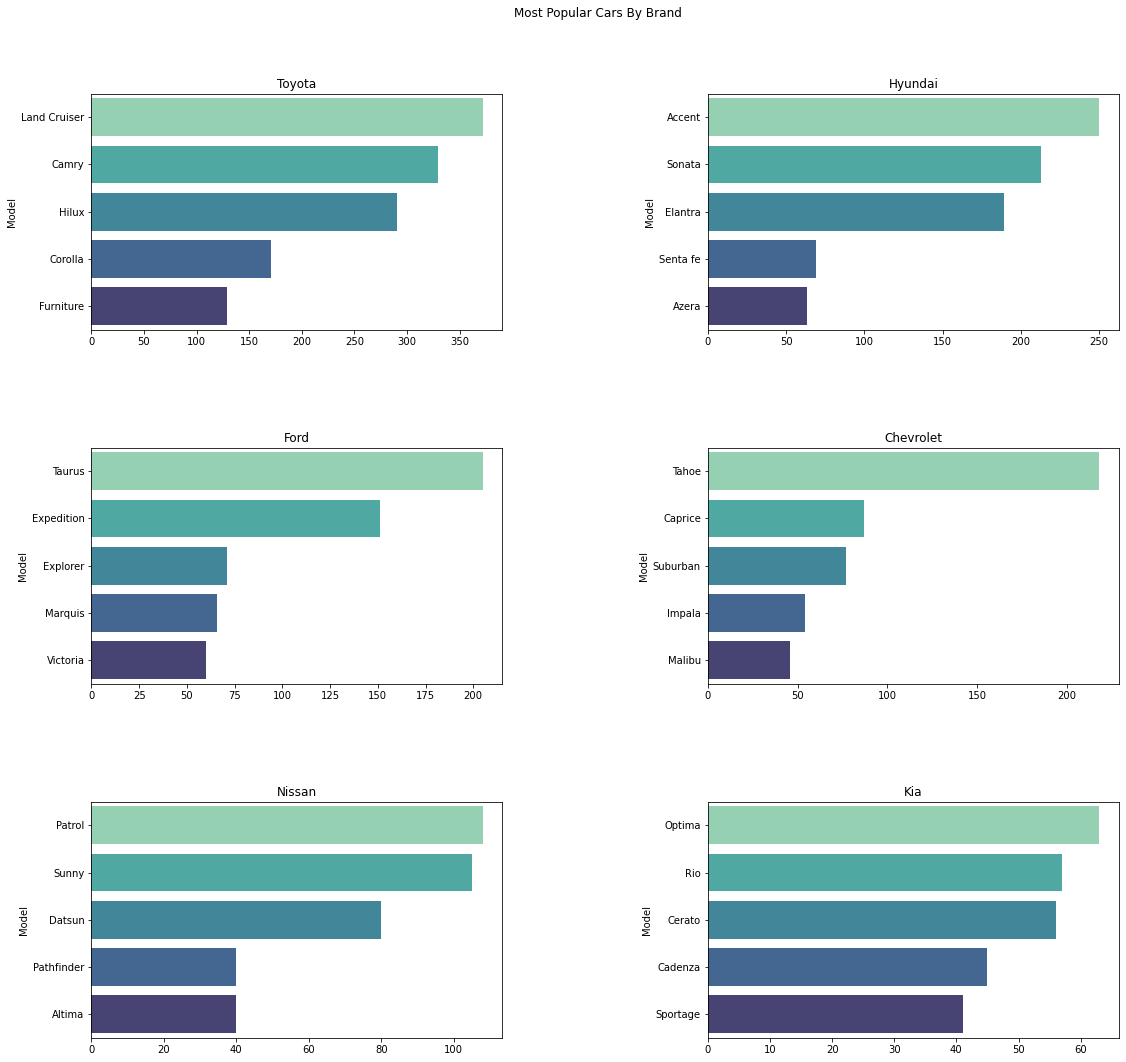

In [50]:
###**

fig, axes = plt.subplots(3, 2, figsize=(15,15))
fig.suptitle('Most Popular Cars By Brand')
fig.tight_layout()
fig.subplots_adjust(top=0.9, wspace=0.5, hspace=0.5)

df_Toyota = df_topcar[df_topcar['Make'] == 'Toyota']
sns.countplot(ax=axes[0][0], data = df_Toyota, y ='Type', order = pd.value_counts(df_Toyota['Type']).iloc[:5].index )
axes[0][0].set_title('Toyota')
axes[0][0].set(xlabel='', ylabel='Model')


df_Hyundai = df_topcar[df_topcar['Make'] == 'Hyundai']
sns.countplot(ax=axes[0][1], data = df_Hyundai, y ='Type', order = pd.value_counts(df_Hyundai['Type']).iloc[:5].index )
axes[0][1].set_title('Hyundai')
axes[0][1].set(xlabel='', ylabel='Model')


df_Ford = df_topcar[df_topcar['Make'] == 'Ford']
sns.countplot(ax=axes[1][0], data = df_Ford, y ='Type', order = pd.value_counts(df_Ford['Type']).iloc[:5].index )
axes[1][0].set_title('Ford')
axes[1][0].set(xlabel='', ylabel='Model')


df_Chevrolet = df_topcar[df_topcar['Make'] == 'Chevrolet']
sns.countplot(ax=axes[1][1], data = df_Chevrolet, y ='Type', order = pd.value_counts(df_Chevrolet['Type']).iloc[:5].index )
axes[1][1].set_title('Chevrolet')
axes[1][1].set(xlabel='', ylabel='Model')


df_Nissan = df_topcar[df_topcar['Make'] == 'Nissan']
sns.countplot(ax=axes[2][0], data = df_Nissan, y ='Type', order = pd.value_counts(df_Nissan['Type']).iloc[:5].index )
axes[2][0].set_title('Nissan')
axes[2][0].set(xlabel='', ylabel='Model');


df_Kia = df_topcar[df_topcar['Make'] == 'Kia']
sns.countplot(ax=axes[2][1], data = df_Kia, y ='Type', order = pd.value_counts(df_Kia['Type']).iloc[:5].index )
axes[2][1].set_title('Kia')
axes[2][1].set(xlabel='', ylabel='Model');

#plt.savefig('test1.png')

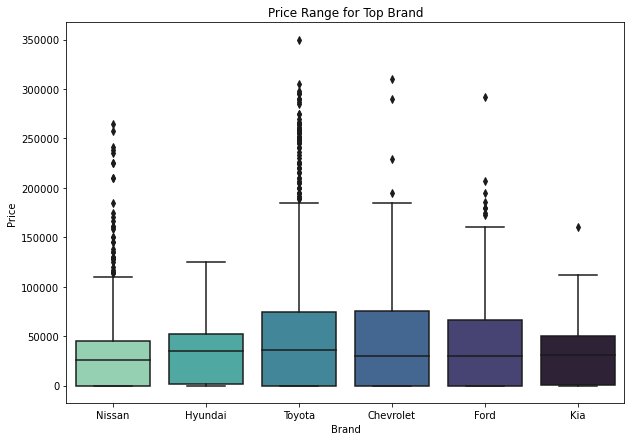

In [51]:
plt.figure(figsize=(10,7))
plt.title('Price Range for Top Brand')
boxplot = sns.boxplot(data = df_topcar, x='Make', y ='Price')
boxplot.set(xlabel='Brand', ylabel='Price');
#plt.savefig('test.png') 

In [52]:
df_price = df[['Year', 'Price']].sort_values('Year')
df_price = df_topcar[(df_topcar["Year"] >= 2010) & (df_topcar["Year"] <= 2021)]
df_price

,Make,Type,Price,Year
1,Nissan,Patrol,0,2016
2,Nissan,Sunny,27500,2019
3,Hyundai,Elantra,43000,2019
4,Hyundai,Elantra,59500,2019
6,Toyota,Land Cruiser,92000,2011
...,...,...,...,...
8240,Ford,Edge,30000,2013
8241,Kia,Cadenza,25000,2012
8244,Chevrolet,Camaro,53000,2010
8245,Toyota,Land Cruiser,0,2013


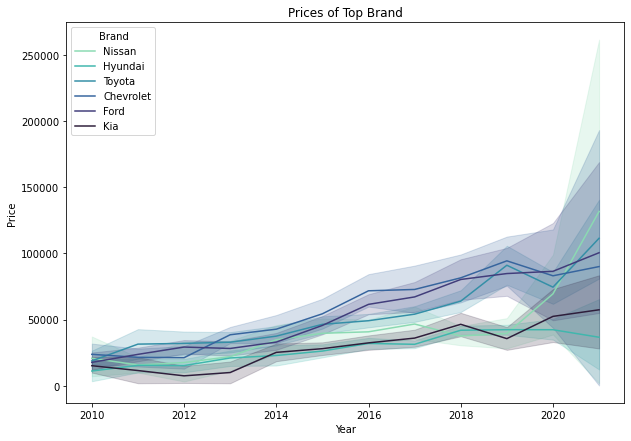

In [53]:
plt.figure(figsize=(10,7))
plt.title('Prices of Top Brand')
sns.lineplot(data=df_price, x="Year", y="Price", hue="Make")
plt.legend(title = 'Brand', loc='upper left');

<Figure size 1440x2160 with 0 Axes>

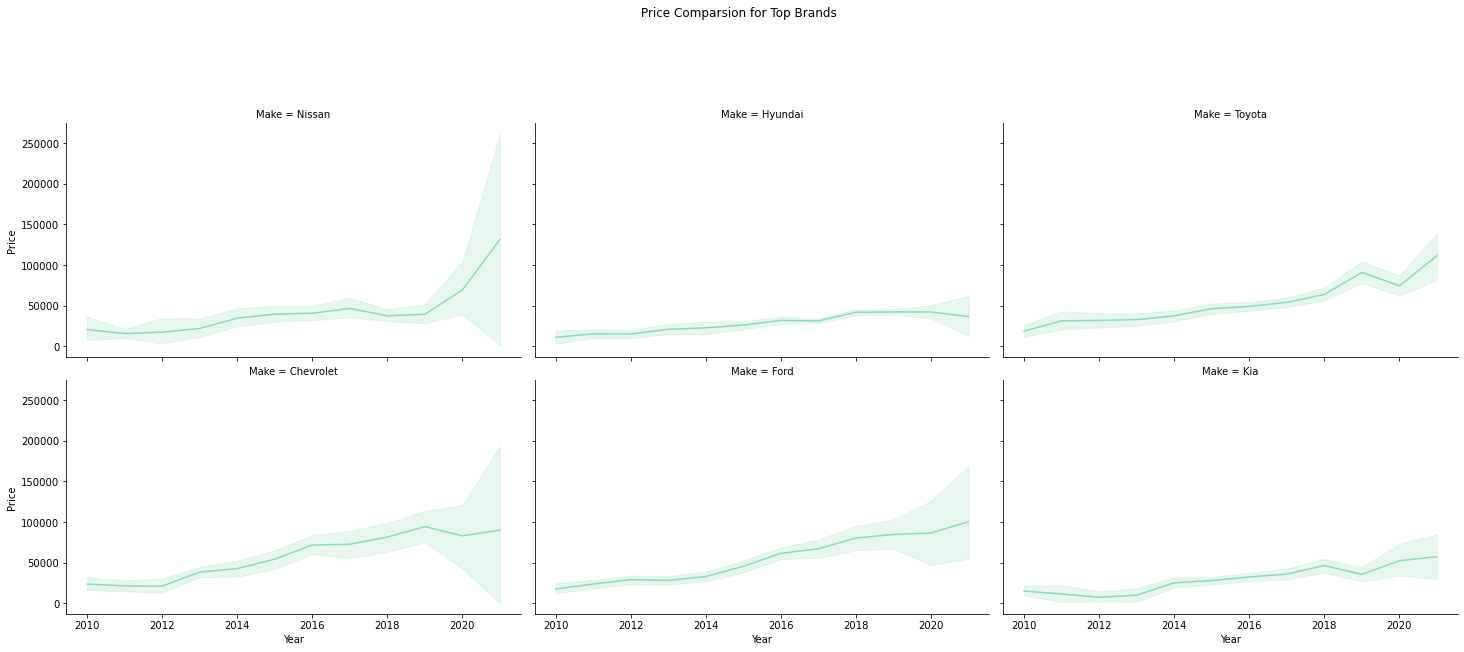

In [54]:
###*
plt.figure(figsize=(20,30))
plot = sns.relplot(data=df_price, x="Year", y="Price", kind="line", 
            col="Make", col_wrap=3, height=4.5, aspect=1.5)
plot.fig.subplots_adjust(top=0.8)
plot.fig.suptitle('Price Comparsion for Top Brands');

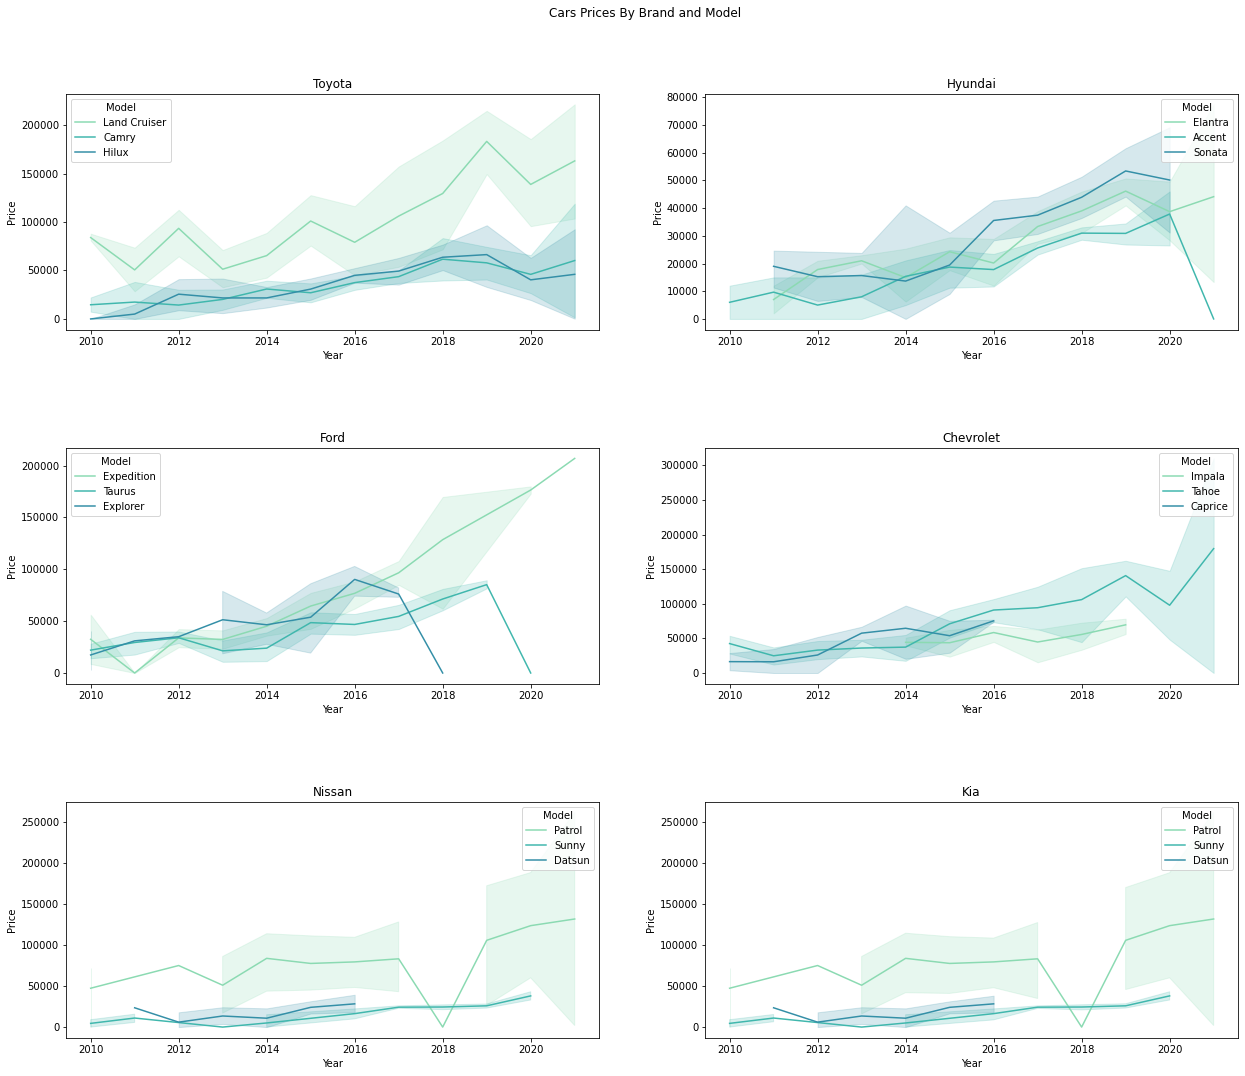

In [55]:
fig, axes = plt.subplots(3, 2, figsize=(17,15))
fig.suptitle('Cars Prices By Brand and Model')
fig.tight_layout()
fig.subplots_adjust(top=0.9, wspace=0.2, hspace=0.5)

df_Toyota = df_price[df_price['Make'] == 'Toyota']
Toyota_top = df_Toyota[df_Toyota['Type'].isin(['Camry', 'Land Cruiser', 'Hilux'])]
sns.lineplot(ax=axes[0][0], data=Toyota_top, x="Year", y="Price", hue = 'Type')
axes[0][0].set_title('Toyota')
axes[0][0].set(xlabel='Year', ylabel='Price')
axes[0][0].legend(title='Model')


df_Hyundai = df_price[df_price['Make'] == 'Hyundai']
Hyundai_top = df_Hyundai[df_Hyundai['Type'].isin(['Accent', 'Sonata', 'Elantra'])]
sns.lineplot(ax=axes[0][1], data=Hyundai_top, x="Year", y="Price", hue = 'Type')
axes[0][1].set_title('Hyundai')
axes[0][1].set(xlabel='Year', ylabel='Price')
axes[0][1].legend(title='Model')


df_Ford = df_price[df_price['Make'] == 'Ford']
Ford_top = df_Ford[df_Ford['Type'].isin(['Taurus', 'Expedition', 'Explorer'])]
sns.lineplot(ax=axes[1][0], data=Ford_top, x="Year", y="Price", hue = 'Type')
axes[1][0].set_title('Ford')
axes[1][0].set(xlabel='Year', ylabel='Price')
axes[1][0].legend(title='Model')



df_Chevrolet = df_price[df_price['Make'] == 'Chevrolet']
Chevrolet_top = df_Chevrolet[df_Chevrolet['Type'].isin(['Tahoe', 'Caprice', 'Impala'])]
sns.lineplot(ax=axes[1][1], data=Chevrolet_top, x="Year", y="Price", hue = 'Type')
axes[1][1].set_title('Chevrolet')
axes[1][1].set(xlabel='Year', ylabel='Price')
axes[1][1].legend(title='Model')


df_Nissan = df_price[df_price['Make'] == 'Nissan']
Nissan_top = df_Nissan[df_Nissan['Type'].isin(['Sunny', 'Patrol', 'Datsun'])]
sns.lineplot(ax=axes[2][0], data=Nissan_top, x="Year", y="Price", hue = 'Type')
axes[2][0].set_title('Nissan')
axes[2][0].set(xlabel='Year', ylabel='Price')
axes[2][0].legend(title='Model')


df_Kia = df_price[df_price['Make'] == 'Kia']
Kia_top = df_Kia[df_Kia['Type'].isin(['Cerato', 'Optima', 'Rio'])]
sns.lineplot(ax=axes[2][1], data=Nissan_top, x="Year", y="Price", hue = 'Type')
axes[2][1].set_title('Kia')
axes[2][1].set(xlabel='Year', ylabel='Price')
axes[2][1].legend(title='Model');

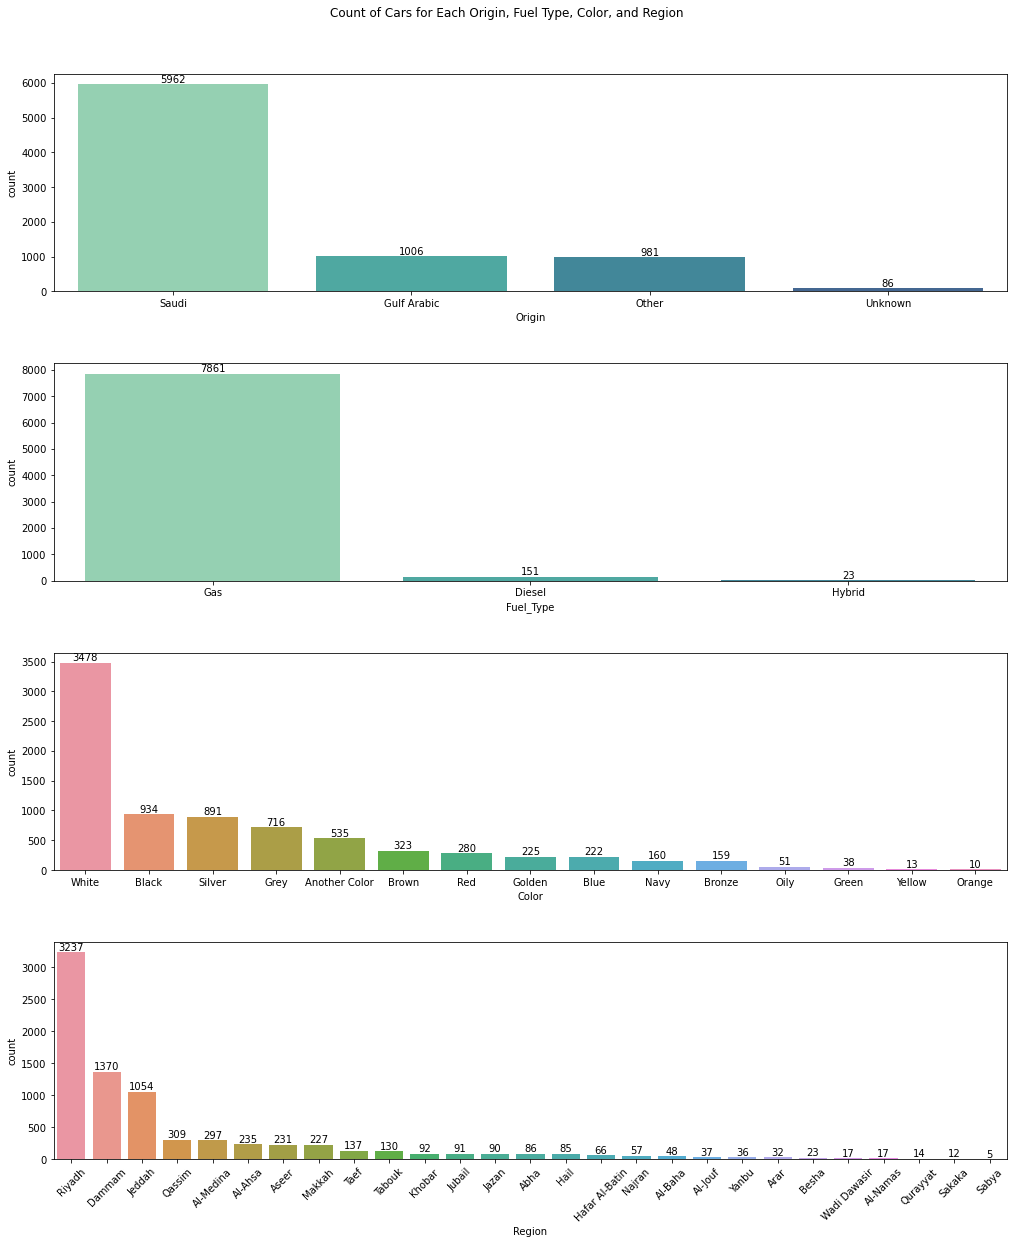

In [56]:
###*

#Function to put text label above the bar (for barplot vertical or horizontal )

#axs = name of plot
#h_v = v= vertical and h=horizontal
#space = space between text label and bar
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + (p.get_width() / 2)
                _y = p.get_y() + p.get_height() 
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center", va="bottom") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)



fig, axes = plt.subplots(4,1, figsize=(15, 18))
fig.suptitle('Count of Cars for Each Origin, Fuel Type, Color, and Region')


#grade
chartA = sns.countplot(ax=axes[0],data=df,x= 'Origin')
show_values_on_bars(chartA,space=0.4)

#gender
chartB = sns.countplot(ax=axes[1],data=df,x= 'Fuel_Type')
show_values_on_bars(chartB,space=0.4)

#race/ethnicity
chartC = sns.countplot(ax=axes[2],data=df,x= 'Color', order = pd.value_counts(df['Color']).index)
show_values_on_bars(chartC, space=0.4)

#race/ethnicity
chartD = sns.countplot(ax=axes[3],data=df,x= 'Region',order = pd.value_counts(df['Region']).index)
show_values_on_bars(chartD, space=0.4)
plt.xticks(rotation=45)


plt.tight_layout(pad=4)